In [18]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.DataFrame()

for day in range(1, 19):
    r = requests.get(f"https://adventofcode.com/2021/leaderboard/day/{day}")
    soup = BeautifulSoup(r.text, "html")
    strings = [t.text for t in soup.find_all("span", class_="leaderboard-time")[:100]]
    times = [datetime.strptime(f"2021 {t}", "%Y %b %d %H:%M:%S") for t in strings]
    start = datetime(year=2021, month=12, day=day)
    minutes = [(t-start).total_seconds()/60 for t in times]
    df[day] = minutes

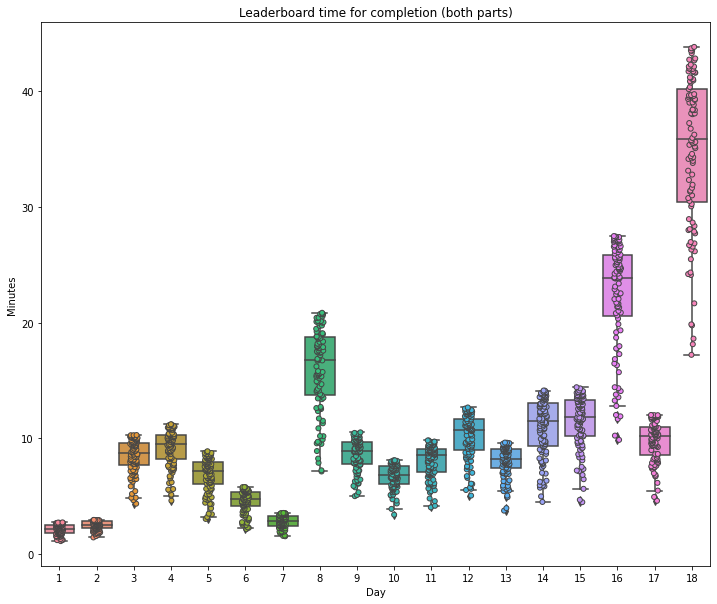

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
sns.stripplot(data=df, linewidth=1, ax=ax)
sns.boxplot(data=df, ax=ax)
ax.set_xlabel("Day")
ax.set_ylabel("Minutes")
ax.set_title("Leaderboard time for completion (both parts)")
fig.savefig("Times.png")